In [1]:
import pandas as pd

This Jupyter Notebook has the purspose to explore the relation between Google Trends and Bitcoin Prices

In [10]:
bitcoin = pd.read_csv('multiTimeline Bitcoin.csv')

In [11]:
bitcoin.head()

,Week,bitcoin: (Worldwide)
0,3/24/13,4
1,3/31/13,6
2,4/7/13,11
3,4/14/13,6
4,4/21/13,3


In [12]:
from datetime import datetime
dates_btc = []
weeks_btc = []
for i in range(len(bitcoin)):
    dt = datetime.strptime(bitcoin['Week'][i], '%m/%d/%y')
    year = dt.year
    week = dt.isocalendar()[1]
    if int(week) < 10:
        weeks_btc.append(str(year)+'-0'+str(week))
    else:
        weeks_btc.append(str(year)+'-'+str(week))

In [13]:
weeks_google_btc = pd.DataFrame(weeks_btc)
bitcoin['weeks_btc'] = weeks_btc

In [14]:
bitcoin.index = bitcoin['weeks_btc']
bitcoin.drop(['Week','weeks_btc'], axis = 1, inplace = True)
bitcoin.head()

,bitcoin: (Worldwide)
weeks_btc,
2013-12,4
2013-13,6
2013-14,11
2013-15,6
2013-16,3


In [67]:
btc_charts = pd.read_csv('Bitcoin_Charts.csv')

In [75]:
btc_charts.head()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,week
0,3/25/14 0:00,585.9,587.48,568.86,583.77,8107.38,4681178.66,577.4,2014-13
1,3/26/14 0:00,583.77,592,565,581.49,10310.36,5986251.83,580.61,2014-13
2,3/27/14 0:00,581.48,581.59,466.1,475.00,49205.96,25830547.04,524.95,2014-13
3,3/28/14 0:00,475,532,468.3,502.01,34960.06,17558323.58,502.24,2014-13
4,3/29/14 0:00,502.01,508,486.97,491.99,7446.56,3710682.75,498.31,2014-13


In [69]:
btc_charts = btc_charts[btc_charts['Close'].str.match("[0-9]")]

In [76]:
btc_charts['Close'] = btc_charts['Close'].astype('float')
btc_charts['Volume (Currency)'] = btc_charts['Volume (Currency)'].astype('float')

In [77]:
from datetime import datetime
dates_btc = []
weeks_btc = []
for i in range(len(btc_charts)):
    dt = datetime.strptime(btc_charts.iloc[i,0], '%m/%d/%y %H:%M')
    year = dt.year
    week = dt.isocalendar()[1]
    if int(week) < 10:
        weeks_btc.append(str(year)+'-0'+str(week))
    else:
        weeks_btc.append(str(year)+'-'+str(week))

In [78]:
week_btc_charts= pd.DataFrame(weeks_btc)
btc_charts['week'] = week_btc_charts
grps_btc_charts = btc_charts.groupby(by = 'week')

In [79]:
volume = grps_btc_charts['Volume (Currency)'].describe()['mean']
close_price = grps_btc_charts['Close'].describe()['mean']

In [84]:
#volume['close_price'] = close_price
data_btc_charts = pd.DataFrame(data = {'closed_price':close_price, 'volume':volume})

In [86]:
data_btc_charts.head()

,closed_price,volume
2014-01,315.026667,2.31987e+06
2014-13,515.710000,1.20367e+07
2014-14,456.730000,8.63078e+06
2014-15,424.030000,7.8688e+06
2014-16,499.500000,1.01039e+07


In [89]:
final_data_all = bitcoin.join(data_btc_charts, how='inner')
final_data_all.columns = ('bitcoin','close_price','volume')

In [90]:
final_data_all.head()

,bitcoin,close_price,volume
2014-01,7,315.026667,2.31987e+06
2014-13,4,515.710000,1.20367e+07
2014-14,3,456.730000,8.63078e+06
2014-15,3,424.030000,7.8688e+06
2014-16,3,499.500000,1.01039e+07


In [123]:
final_data_all = final_data_all.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')

In [166]:
final_data_all.columns = ('Google Trends','Price','Volume')

/Users/JD/miniconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


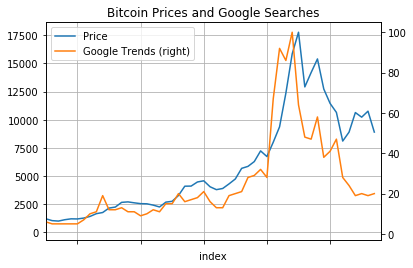

In [175]:
final_data_all.plot(y=['Price','Google Trends'], grid = True, secondary_y='Google Trends', xlim=[155,208], title='Bitcoin Prices and Google Searches')


It seems that Google Trend Bitcoin searches leads 1 week Bitcoin prices, checking the correlationes between normal variables and google trends lagged variables:

In [161]:
import numpy as np
np.corrcoef(final_data_all.iloc[145:208, 0], final_data_all.iloc[145:208, 1])

array([[1.        , 0.82439854],
       [0.82439854, 1.        ]])

In [162]:
np.corrcoef(final_data_all.iloc[144:207, 0], final_data_all.iloc[145:208, 1])

array([[1.        , 0.88253801],
       [0.88253801, 1.        ]])

In [163]:
from scipy import stats
stats.spearmanr(final_data_all.iloc[145:208, 0], final_data_all.iloc[145:208, 1])

SpearmanrResult(correlation=0.9481766214485271, pvalue=4.5345455830947003e-32)

In [164]:
stats.spearmanr(final_data_all.iloc[144:207, 0], final_data_all.iloc[145:208, 1])

SpearmanrResult(correlation=0.9544535495384683, pvalue=9.687373952289995e-34)

Google Trend variables 1 week have a higher correlation with Bitcoin Prices!

In [176]:
final_data_all.head()

,Google Trends,Price,Volume
index,,,
2014-01,7,315.026667,2.31987e+06
2014-13,4,515.710000,1.20367e+07
2014-14,3,456.730000,8.63078e+06
2014-15,3,424.030000,7.8688e+06
2014-16,3,499.500000,1.01039e+07


In [192]:
ds = pd.Series([0]) 
ds = ds.append(final_data_all.iloc[0:207,0])
final_data_all['Google_lagged'] =ds.values

In [195]:
final_data_all.head()

,Google Trends,Price,Volume,Google_lagged
index,,,,
2014-01,7,315.026667,2.31987e+06,0
2014-13,4,515.710000,1.20367e+07,7
2014-14,3,456.730000,8.63078e+06,4
2014-15,3,424.030000,7.8688e+06,3
2014-16,3,499.500000,1.01039e+07,3


/Users/JD/miniconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


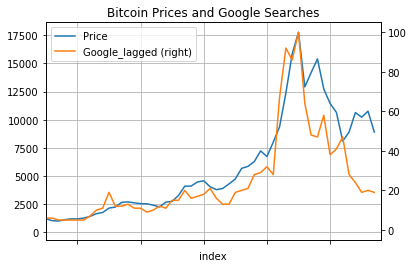

In [197]:
final_data_all.plot(y=['Price','Google_lagged'], grid = True, secondary_y=['Google_lagged'], xlim=[155,208], title='Bitcoin Prices and Google Searches')


This graphs shows how the lagged variable (1 week) of Google Trends of bitcoin searches have a higher correlation coefficient, indicating that Google Trends can be a good predictor of the prices in scenarios of high volatility and speculation.

This analysis could be extendend to include sentiment analysis for the news showed on internet to create a robust prediciton system.

In [ ]:
import os
cwd = os.getcwd()
final_data_all.to_csv(cwd + '/final_data_all.csv', sep = ',')